In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [16]:
import matplotlib.pyplot as plt

In [17]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [18]:
df = tf.keras.preprocessing.image_dataset_from_directory("PotatoPlants",
                                                        shuffle=True,
                                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        batch_size=BATCH_SIZE)
                                                         

Found 2152 files belonging to 3 classes.


In [19]:
class_names = df.class_names

In [20]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
len(df)

68

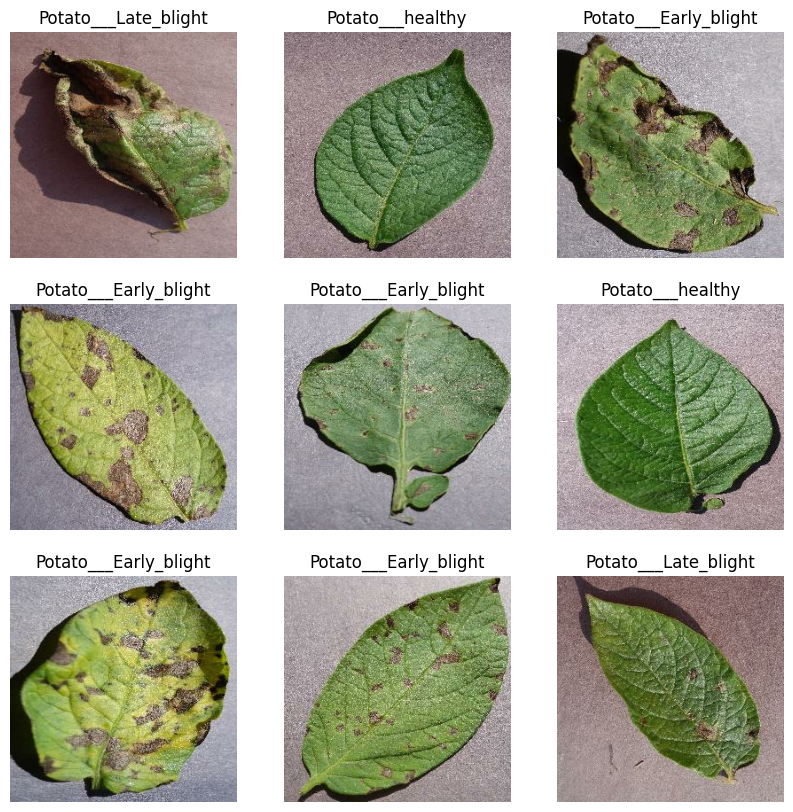

In [22]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [23]:
CHANNELS = 3

In [24]:
def data_partition(df,shufle = True,shuffle_size = 10000):
    if shufle:
        df = df.shuffle(shuffle_size,seed = 12)
    train_size = int(0.8 * len(df))
    val_size = int(0.1 * len(df))
    test_size = int(0.1 * len(df))
    train = df.take(train_size)
    val = df.skip(train_size).take(val_size)
    test = df.skip(train_size + val_size).take(test_size)
    return train, val, test

In [25]:
train, val, test = data_partition(df)

In [26]:
len(train), len(val), len(test)

(54, 6, 6)

In [27]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val = val.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [28]:
# tf.keras.applications.ResNet50(
#     include_top=True, weights='imagenet', input_tensor=None,
#     input_shape=None, pooling=None, classes=1000
# )

In [29]:
resiz_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [31]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = len(class_names)
model = models.Sequential([
    resiz_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape)

d:\CODING\PROJECTS\Potato-disease GEN AI\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [34]:
history = model.fit(
          train,
          validation_data=val,
          batch_size=BATCH_SIZE,
          epochs=50,
          verbose=1
          )

Epoch 1/50


d:\CODING\PROJECTS\Potato-disease GEN AI\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 517ms/step - accuracy: 0.4525 - loss: 0.9657 - val_accuracy: 0.4375 - val_loss: 0.9071
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 523ms/step - accuracy: 0.6140 - loss: 0.7827 - val_accuracy: 0.8021 - val_loss: 0.5498
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.8206 - loss: 0.4689 - val_accuracy: 0.8490 - val_loss: 0.4573
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 514ms/step - accuracy: 0.8678 - loss: 0.3322 - val_accuracy: 0.9219 - val_loss: 0.2064
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 621ms/step - accuracy: 0.9147 - loss: 0.2191 - val_accuracy: 0.9375 - val_loss: 0.2099
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 511ms/step - accuracy: 0.9328 - loss: 0.1886 - val_accuracy: 0.9271 - val_loss: 0.2090
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 509ms/step - accuracy: 0.9178 - loss: 0.2033 - val_accuracy: 0.9271 - val_loss: 0.1626
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 525ms/step - accuracy: 0.9364 - loss: 0.1558 - val_accuracy: 0.932

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [38]:
epoches_range = range(50)

Text(0.5, 1.0, 'Training and Validation Loss')

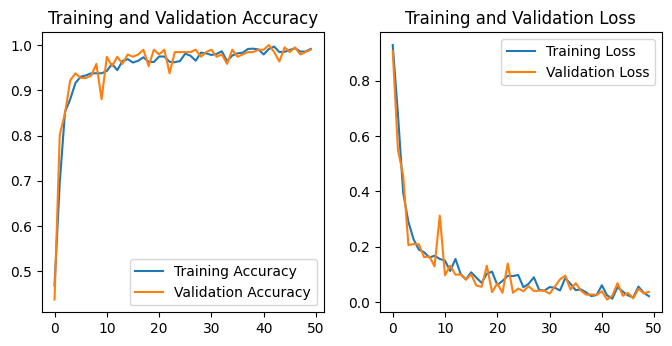

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epoches_range, acc, label='Training Accuracy')
plt.plot(epoches_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epoches_range, loss, label='Training Loss')
plt.plot(epoches_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [40]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions =  model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

In [41]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


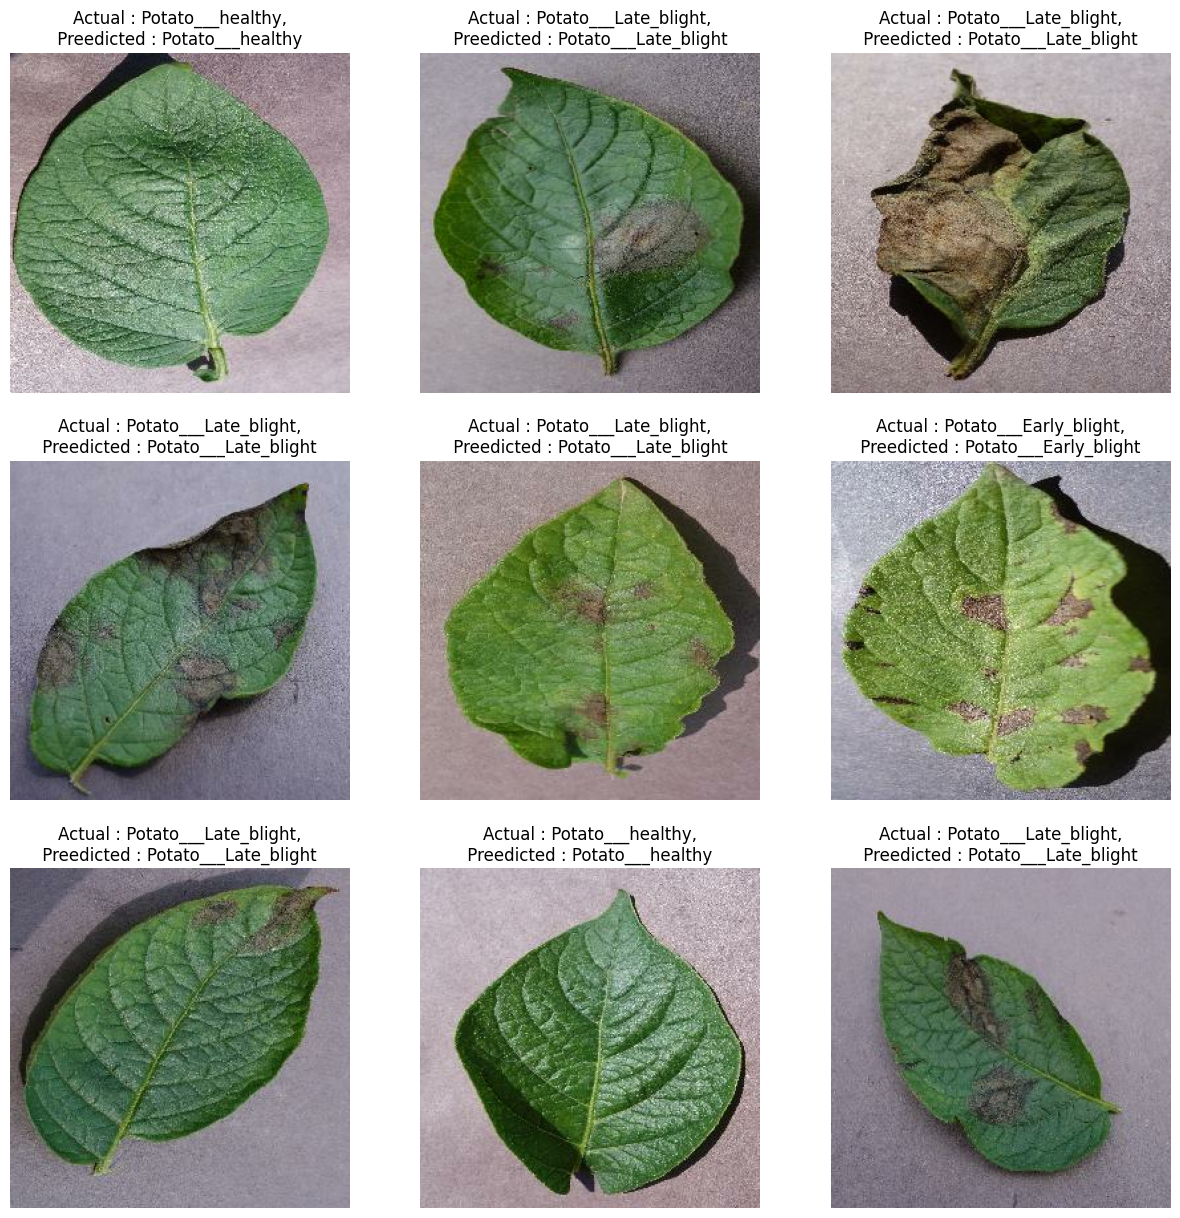

In [42]:
plt.figure(figsize=(15,15))
for images,labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1) 
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Preedicted : {predicted_class} ")
        plt.axis('off')


In [49]:
import os

model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_version = max([int(i.split('.')[0]) for i in os.listdir(model_dir) if i.split('.')[0].isdigit()] + [0]) + 1
# model.save(f"{model_dir}/{model_version}.keras")
tf.saved_model.save(model,f"{model_dir}/{model_version}")


TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [52]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']